줌에 들어갈 수 있는 환경이며 PC로 접속해야 한다.

데이터프레임을 빠르게 잘 바꾸는 게 관건이다.

ChatGPT나 구글 검색을 활용 가능, 가급적이면 Lecture Note에 있는 문법을 참고하는 게 좋음.

기출문제 스타일이 다름, 무조건 소개한 문법 위주로 냅니다. 매년 풀이 스타일이 다를 수 있음.

시험 대비의 가장 좋은 방법은 Lecture의 예제에 있는 코드들을 안보고 막힘없이 쓸 수 있다면 만점.

## 1. 라이브러리 imports

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

## 2. 사전지식

### **A. pd.concat()**
---




\- 위 아래로 concatenate

In [3]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'A':[-1,-2,-3],'B':[-2,-3,-4]})

In [6]:
display("df1", df1)
display("df2", df2)

'df1'

,A,B
0,1,2
1,2,3
2,3,4


'df2'

,A,B
0,-1,-2
1,-2,-3
2,-3,-4


> 콘솔에선 한 개만 보여주니까 둘 다 띄워주게끔 display()를 사용한 모습

In [9]:
pd.concat([df1, df2], axis = 0).reset_index(drop = True)    ## axis의 디폴트는 0이다(세로로 합침), 인덱스는 012012이니까 리셋해줬다...

,A,B
0,1,2
1,2,3
2,3,4
3,-1,-2
4,-2,-3
5,-3,-4


\- 좌우로 concatenate

In [15]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'C':[-1,-2,-3],'D':[-2,-3,-4]})

In [18]:
pd.concat([df1, df2], axis = 0)  ## 원하지 않는 방안, 이상하게 만듦

,A,B,C,D
0,1.0,2.0,NaN,NaN
1,2.0,3.0,NaN,NaN
2,3.0,4.0,NaN,NaN
0,NaN,NaN,-1.0,-2.0
1,NaN,NaN,-2.0,-3.0
2,NaN,NaN,-3.0,-4.0


In [19]:
pd.concat([df1, df2], axis = 1)

,A,B,C,D
0,1,2,-1,-2
1,2,3,-2,-3
2,3,4,-3,-4


### **pd.merge()**
---




\- 병합(사이즈가 맞지 않는 두 데이터프레임의 정보를 결합)

In [12]:
big = pd.DataFrame({'department':['A','A','B','B'], 'gender':['male','female','male','female'],'count':[1,2,3,1]})
small = pd.DataFrame({'department':['A','B'], 'total':[3,4]})

In [14]:
display('big', big) ## title을 달아주고 아래 산출
display('small', small)

'big'

,department,gender,count
0,A,male,1
1,A,female,2
2,B,male,3
3,B,female,1


'small'

,department,total
0,A,3
1,B,4


> 둘 다 있는 정보 자체가 다름

In [20]:
big.merge(small)  ## big을 기준으로 small이 병합됨

,department,gender,count,total
0,A,male,1,3
1,A,female,2,3
2,B,male,3,4
3,B,female,1,4


In [22]:
small.merge(big)  ## small을 기준으로 big이 병합됨

,department,total,gender,count
0,A,3,male,1
1,A,3,female,2
2,B,4,male,3
3,B,4,female,1


### **C. `.applymap()`**
---




In [23]:
np.random.seed(43052)
df = pd.DataFrame({'A':np.random.rand(3), 'B':np.random.rand(3)})
df

,A,B
0,0.817682,0.619777
1,0.049532,0.122541
2,0.838686,0.117128


> 0.5보다 크면 yes, 0.5보다 작으면 no를 return하는 함수를 작성하고 싶다면...

In [24]:
df.applymap(lambda x : 'yes' if x > 0.5 else 'no')  ## 모든 원소에 해당 함수가 적용된다. df.apply()의 경우 행이나 열에 집계함수가 적용된다.

,A,B
0,yes,yes
1,no,no
2,yes,no


### **D. `df.astype()`**
---



\- 데이터프레임의 형식을 일괄적으로 변경(시리즈도 됨)

In [25]:
df = pd.DataFrame({'A':[0,1,2],'B':[4,5,6]})
df

,A,B
0,0,4
1,1,5
2,2,6


In [26]:
df.astype(float)

,A,B
0,0.0,4.0
1,1.0,5.0
2,2.0,6.0


### **E. 데이터프레임 열의 형식**
---




\- <span style:color=red>object형은 일괄적으로 문자형임을 의미하는 게 아님</span>

In [27]:
np.random.seed(43052)
df = pd.DataFrame({'A':['1','2','0','1',2], 'B':['2','3','0','0',0]})
df

,A,B
0,1,2
1,2,3
2,0,0
3,1,0
4,2,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       5 non-null      object
 1   B       5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [29]:
df.A[0],df.A[4],df.B[0],df.B[4]

('1', 2, '2', 0)

\- column이름이 이상하게 들어가 있는 경우가 있음.

In [30]:
df = pd.DataFrame({('A',''):[0,0,0], ('B',''):[1,1,1]})
df

,A,B
,,
0,0,1
1,0,1
2,0,1


In [31]:
df['A']

0    0
1    0
2    0
Name: A, dtype: int64

In [33]:
df[('A','')]

0    0
1    0
2    0
Name: (A, ), dtype: int64

> 상당히 미친 상황이다. 인덱스를 다시 설정해주는 편이 정신건강에 좋음

## 3. 에너지 사용량 시각화

문제

In [34]:
pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv')

,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방
0,종로구,"17,851","9,204,140","63,492","76,653",799
1,중구,"10,383","10,078,848","79,223","68,210",497
2,용산구,"17,138","10,756,612","51,229","79,805","11,128"
3,성동구,"13,980","11,804,313","59,832","99,986",0
4,광진구,"21,556","12,272,738","68,756","123,447",0
5,동대문구,"21,794","12,664,554","65,913","111,420",0
6,중랑구,"23,950","15,182,802","59,370","109,284","7,442"
7,성북구,"27,112","15,938,807","77,007","148,376",0
8,강북구,"23,334","9,458,987","47,731","100,045",0
9,도봉구,"13,168","10,644,704","44,985","90,379","5,268"


에너지 사용량은 2018년부터 2021년까지의 기간 동안 서울, 부산 등 여러 지역에 대해 정리되어 있으며, 아래 주소 형식으로 저장되어 있다.
```
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
...
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv
````

아래의 `url`, `prov`를 참고하여 모든 자료를 불러온 뒤 `pd.concat()`을 이용하여 하나의 df로 합쳐라.

In [67]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon',
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi',
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do',
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

In [43]:
url.format('Seoul2018')  ## format()은 스트링 안에 괄호가 있다면 그곳에 문자를 넣는다.

'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv'

In [73]:
pd.concat([pd.read_csv(url.format(region + str(year))) for year in range(2018, 2022) for region in prov], axis = 0).reset_index(drop = True)

,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방
0,종로구,"17,929","9,141,777","64,818","82,015",111
1,중구,"10,598","10,056,233","81,672","75,260",563
2,용산구,"17,201","10,639,652","52,659","85,220","12,043"
3,성동구,"14,180","11,631,770","60,559","107,416",0
4,광진구,"21,520","12,054,796","70,609","130,308",0
...,...,...,...,...,...,...
995,함양군,"12,505","1,509,149","6,328","3,164",0
996,거창군,"14,607","2,322,093","10,404","8,850",0
997,합천군,"16,039","1,612,734","7,587",0,0
998,제주시,"67,053","20,275,738","103,217","25,689",0


In [55]:
df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y, 시도=p) for p in prov for y in ['2018', '2019', '2020', '2021']]).reset_index(drop=True)
df

,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방,년도,시도
0,종로구,"17,929","9,141,777","64,818","82,015",111,2018,Seoul
1,중구,"10,598","10,056,233","81,672","75,260",563,2018,Seoul
2,용산구,"17,201","10,639,652","52,659","85,220","12,043",2018,Seoul
3,성동구,"14,180","11,631,770","60,559","107,416",0,2018,Seoul
4,광진구,"21,520","12,054,796","70,609","130,308",0,2018,Seoul
...,...,...,...,...,...,...,...,...
995,서귀포시,"34,729","7,233,931","34,641","1,306",0,2019,Jeju-do
996,제주시,"66,504","19,819,923","99,212","22,179",0,2020,Jeju-do
997,서귀포시,"34,880","7,330,040","35,510","1,639",0,2020,Jeju-do
998,제주시,"67,053","20,275,738","103,217","25,689",0,2021,Jeju-do


(2) 의미상 숫자형이지만 문자형으로 입력이 된 자료를 모두 전처리하라.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   지역                1000 non-null   object
 1   건물동수              1000 non-null   object
 2   연면적               1000 non-null   object
 3   에너지사용량(TOE)/전기    1000 non-null   object
 4   에너지사용량(TOE)/도시가스  1000 non-null   object
 5   에너지사용량(TOE)/지역난방  1000 non-null   object
 6   년도                1000 non-null   object
 7   시도                1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


> 하나도 입력값이 숫자형이지 않다. 애초에 쉼표(`,`)가 들어가 있으니 당연하다.

In [59]:
df.assign(년도 = df.년도.astype(int)).set_index(['년도', '시도', '지역']).applymap(lambda x : x.replace(',',''))

AttributeError: ignored

> integer인 녀석이 있어서 replace를 사용할 수 없다고 나온다.

In [56]:
df.assign(년도 = df.년도.astype(int)).set_index(['년도','시도','지역'])\
.applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()

,년도,시도,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방
0,2018,Seoul,종로구,17929,9141777,64818,82015,111
1,2018,Seoul,중구,10598,10056233,81672,75260,563
2,2018,Seoul,용산구,17201,10639652,52659,85220,12043
3,2018,Seoul,성동구,14180,11631770,60559,107416,0
4,2018,Seoul,광진구,21520,12054796,70609,130308,0
...,...,...,...,...,...,...,...,...
995,2019,Jeju-do,서귀포시,34729,7233931,34641,1306,0
996,2020,Jeju-do,제주시,66504,19819923,99212,22179,0
997,2020,Jeju-do,서귀포시,34880,7330040,35510,1639,0
998,2021,Jeju-do,제주시,67053,20275738,103217,25689,0


> 년도에는 쉼표가 없으므로 integer로 바꿈

> 년도와 시도, 지역을 배제(문자형)

> 혹시라도 integer인 녀석들을 string으로 변경 후 문자열 바꾸는 메소드를 통해 `,`를 제거, 인덱스 초기화

(3) 열의 이름을 아래와 같이 바꾸라.

In [60]:
name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

In [66]:
df.assign(년도 = df.년도.astype(int)).set_index(['년도','시도','지역'])\
.applymap(lambda x: str(x).replace(',','')).astype(int).reset_index().rename(name_dict, axis = 1)  ## 그대로 적용시키면 된다.

,Year,Prov,Reg,BldgCount,Area,Elec,Gas,Heat
0,2018,Seoul,종로구,17929,9141777,64818,82015,111
1,2018,Seoul,중구,10598,10056233,81672,75260,563
2,2018,Seoul,용산구,17201,10639652,52659,85220,12043
3,2018,Seoul,성동구,14180,11631770,60559,107416,0
4,2018,Seoul,광진구,21520,12054796,70609,130308,0
...,...,...,...,...,...,...,...,...
995,2019,Jeju-do,서귀포시,34729,7233931,34641,1306,0
996,2020,Jeju-do,제주시,66504,19819923,99212,22179,0
997,2020,Jeju-do,서귀포시,34880,7330040,35510,1639,0
998,2021,Jeju-do,제주시,67053,20275738,103217,25689,0


(4) 아래와 같은 그림을 시각화하라

![](https://guebin.github.io/DV2023/posts/08wk-1_files/figure-html/cell-65-1-25b4bfcf-106c-4382-b741-ed59c977c13f.png)

(풀이)

In [74]:
df.assign(년도 = df.년도.astype(int)).set_index(['년도','시도','지역'])\
.applymap(lambda x: str(x).replace(',','')).astype(int).reset_index().rename(name_dict, axis = 1)

,Year,Prov,Reg,BldgCount,Area,Elec,Gas,Heat
0,2018,Seoul,종로구,17929,9141777,64818,82015,111
1,2018,Seoul,중구,10598,10056233,81672,75260,563
2,2018,Seoul,용산구,17201,10639652,52659,85220,12043
3,2018,Seoul,성동구,14180,11631770,60559,107416,0
4,2018,Seoul,광진구,21520,12054796,70609,130308,0
...,...,...,...,...,...,...,...,...
995,2019,Jeju-do,서귀포시,34729,7233931,34641,1306,0
996,2020,Jeju-do,제주시,66504,19819923,99212,22179,0
997,2020,Jeju-do,서귀포시,34880,7330040,35510,1639,0
998,2021,Jeju-do,제주시,67053,20275738,103217,25689,0


> 여기서 면분할을 지역으로 하고, 값의 분할을 Gas, Elec, Heat로 한다.

In [108]:
df.assign(년도 = df.년도.astype(int)).set_index(['년도','시도','지역'])\
.applymap(lambda x: str(x).replace(',','')).astype(int).reset_index().rename(name_dict, axis = 1).drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Year','Prov']).stack().reset_index().rename({'level_2' : 'type', 0 : 'EnergyUse'}, axis = 1)

,Year,Prov,type,EnergyUse
0,2018,Seoul,Elec,64818
1,2018,Seoul,Gas,82015
2,2018,Seoul,Heat,111
3,2018,Seoul,Elec,81672
4,2018,Seoul,Gas,75260
...,...,...,...,...
2995,2021,Jeju-do,Gas,25689
2996,2021,Jeju-do,Heat,0
2997,2021,Jeju-do,Elec,37884
2998,2021,Jeju-do,Gas,2641


In [103]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .set_index(['Year','Prov','Reg','BldgCount','Area']).stack().reset_index().rename({'level_5':'Type',0:'EnergyUse'},axis=1)\
    .pivot_table(index=['Prov','Year'],columns='Type',values='EnergyUse',aggfunc='sum').stack().reset_index().rename({0:'EnergyUse'},axis=1)\
    .eval('logEnergyUse=log(EnergyUse)')

,Prov,Year,Type,EnergyUse,logEnergyUse
0,Busan,2018,Elec,613522,13.326971
1,Busan,2018,Gas,708240,13.470538
2,Busan,2018,Heat,23694,10.072977
3,Busan,2019,Elec,602980,13.309639
4,Busan,2019,Gas,675882,13.423774
...,...,...,...,...,...
199,Ulsan,2020,Gas,306896,12.634264
200,Ulsan,2020,Heat,0,-inf
201,Ulsan,2021,Elec,196412,12.187970
202,Ulsan,2021,Gas,312276,12.651643


5. Prov별로 총 에너지사용량이 많은 상위5개의 Reg을 찾고 아래와 같이 시각화 하라.
![](https://guebin.github.io/DV2023/posts/08wk-1_files/figure-html/cell-71-1-20b38260-b005-4d39-8ce1-2ee9a593ddb9.png)

In [109]:
g = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)\
    .set_index(['Year','Prov','Reg']).sum(axis=1).reset_index().rename({0:'EnergyUse'},axis=1)\
    .pivot_table(index=['Prov','Reg'],columns='Year').sum(axis=1).reset_index().rename({0:'EnergyUse'},axis=1)\
    .groupby('Prov')

In [110]:
tidydata = pd.concat([df.sort_values('EnergyUse',ascending=False).iloc[:5].reset_index(drop=True).reset_index().rename({'index':'Rank'},axis=1) for k,df in g])
tidydata

,Rank,Prov,Reg,EnergyUse
0,0,Busan,부산진구,690344
1,1,Busan,해운대구,689901
2,2,Busan,사하구,522150
3,3,Busan,북구,493913
4,4,Busan,남구,491030
...,...,...,...,...
0,0,Ulsan,남구,607820
1,1,Ulsan,중구,395158
2,2,Ulsan,울주군,394217
3,3,Ulsan,북구,334844


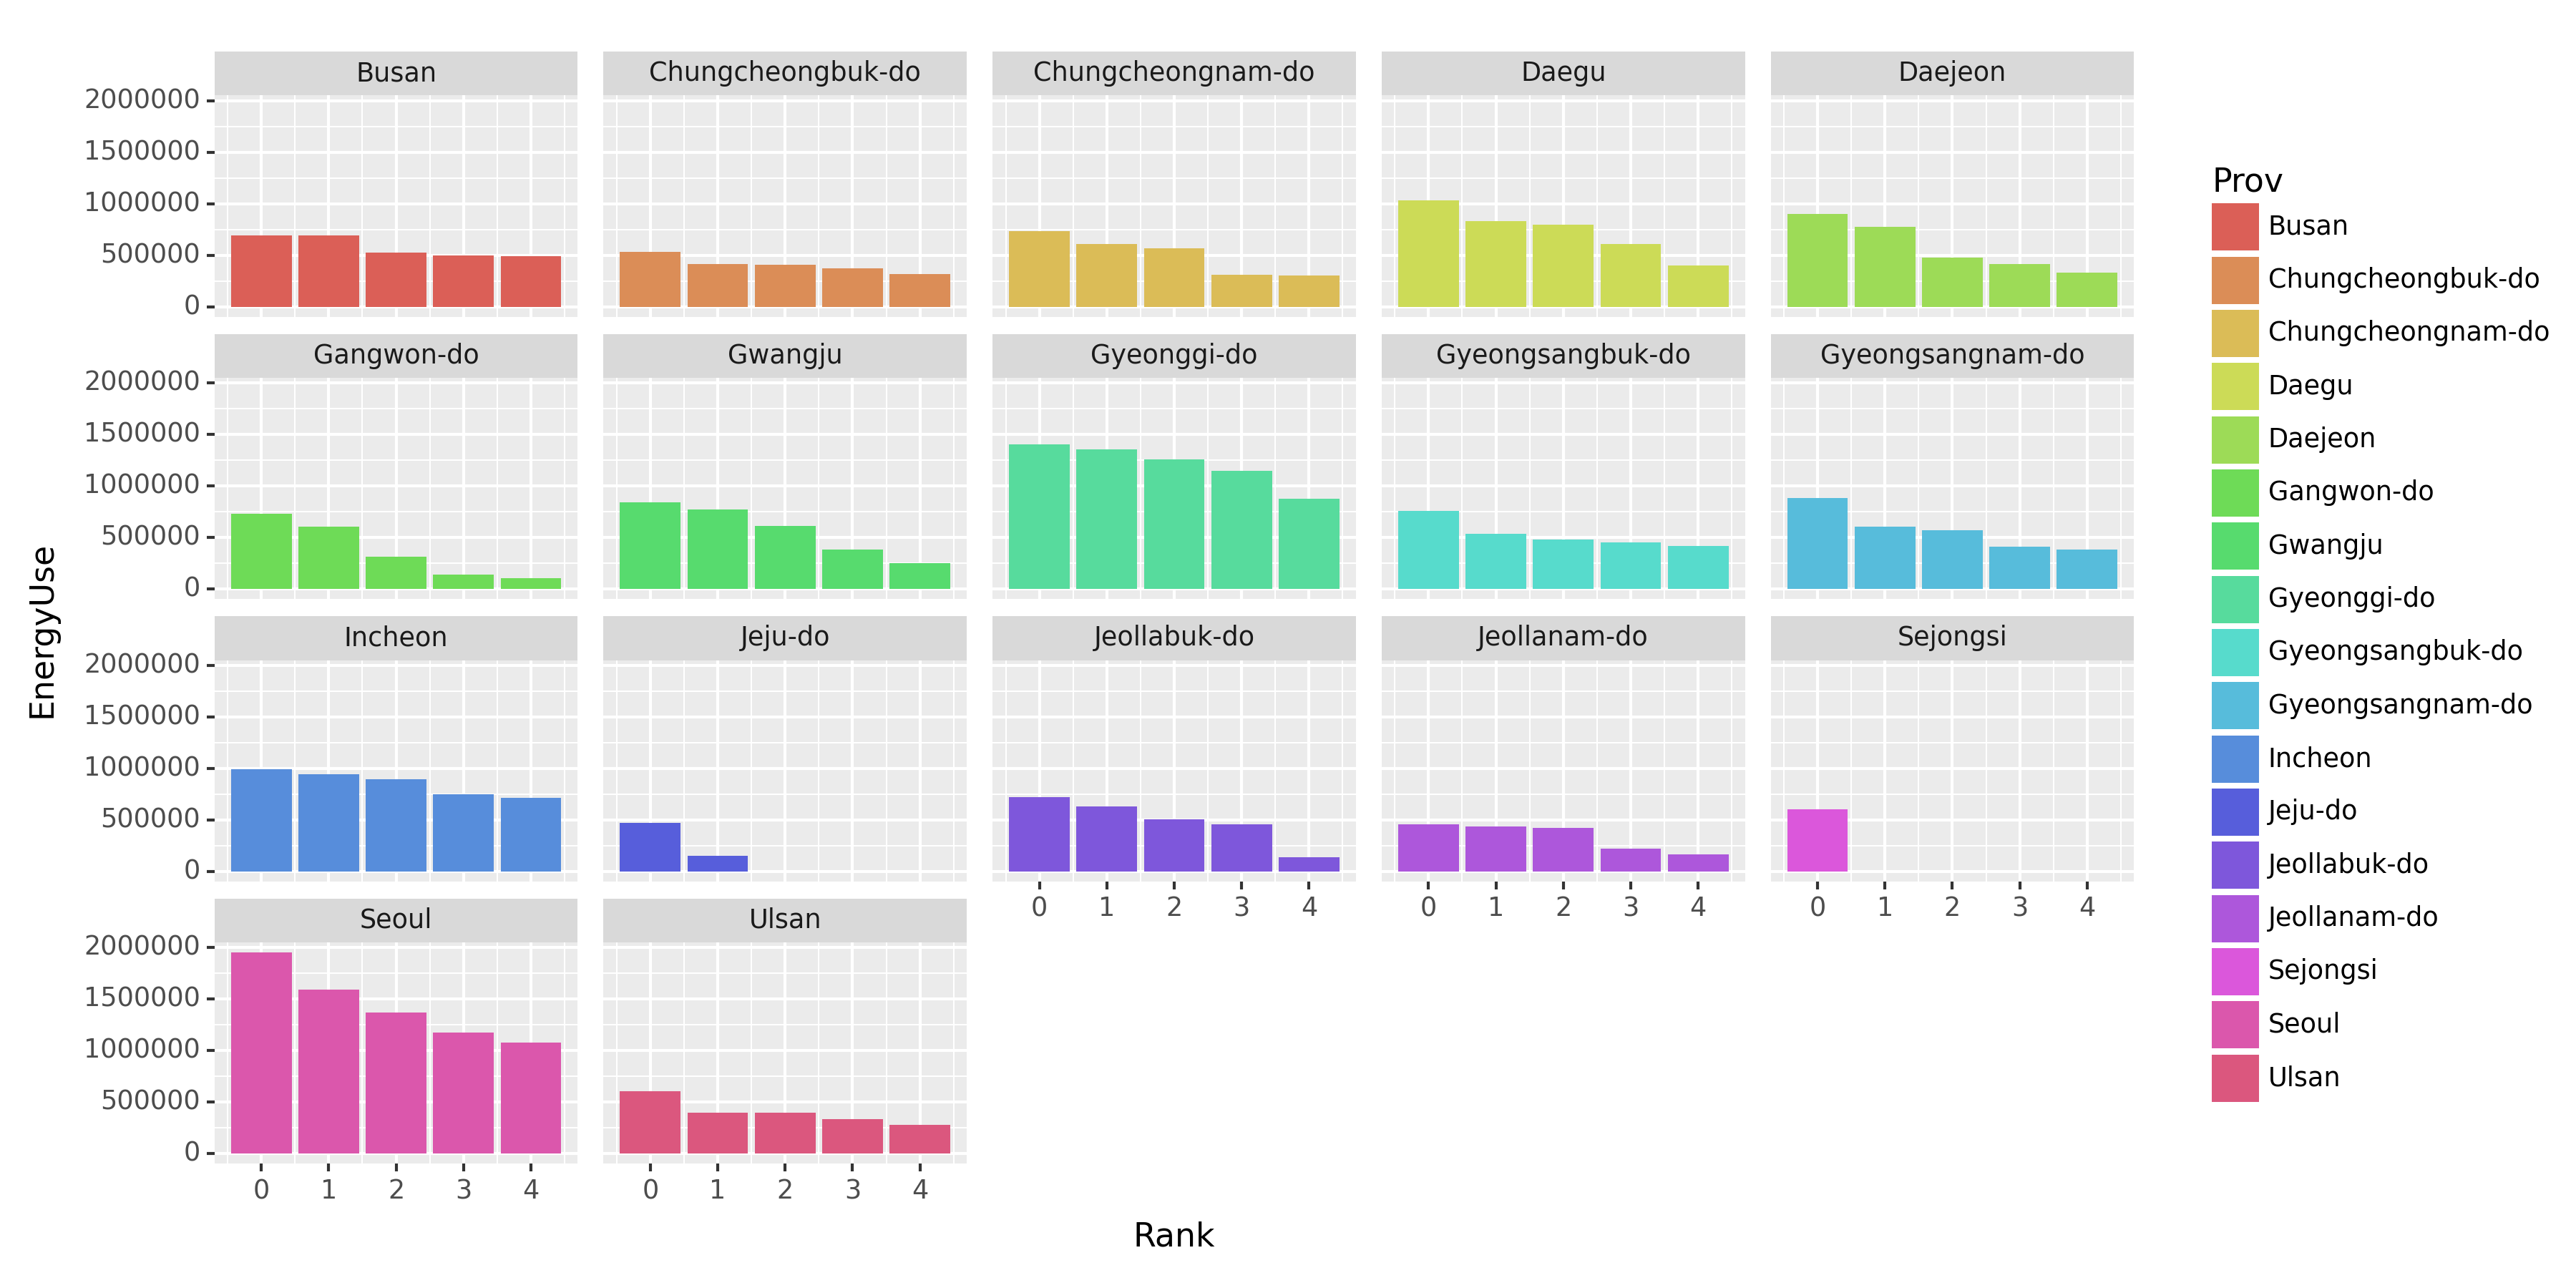

In [119]:
fig = ggplot(tidydata) + geom_col(aes(x = 'Rank', y = 'EnergyUse', fill = 'Prov')) + facet_wrap('Prov')
fig = fig.draw()  ## matplotlib object로 변환
fig.set_size_inches(12, 6)
fig.set_dpi(150)
fig

(5) (Prov,Year)별 전기에너지 사용량 비율을 구하고 아래와 같이 시각화 하라. + 제주를 제외한 지역으로 한정하고 시각화하라.

![](https://guebin.github.io/DV2023/posts/08wk-1_files/figure-html/cell-78-1-b4b7f41b-cd4f-46dd-9f7c-6455be63f23f.png)

In [120]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)

,Year,Prov,Reg,BldgCount,Area,Elec,Gas,Heat
0,2018,Seoul,종로구,17929,9141777,64818,82015,111
1,2018,Seoul,중구,10598,10056233,81672,75260,563
2,2018,Seoul,용산구,17201,10639652,52659,85220,12043
3,2018,Seoul,성동구,14180,11631770,60559,107416,0
4,2018,Seoul,광진구,21520,12054796,70609,130308,0
...,...,...,...,...,...,...,...,...
995,2019,Jeju-do,서귀포시,34729,7233931,34641,1306,0
996,2020,Jeju-do,제주시,66504,19819923,99212,22179,0
997,2020,Jeju-do,서귀포시,34880,7330040,35510,1639,0
998,2021,Jeju-do,제주시,67053,20275738,103217,25689,0


> 타입 바꾸고 이름 변경함

In [133]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1).drop(['Reg','BldgCount','Area'], axis = 1)

,Year,Prov,Elec,Gas,Heat
0,2018,Seoul,64818,82015,111
1,2018,Seoul,81672,75260,563
2,2018,Seoul,52659,85220,12043
3,2018,Seoul,60559,107416,0
4,2018,Seoul,70609,130308,0
...,...,...,...,...,...
995,2019,Jeju-do,34641,1306,0
996,2020,Jeju-do,99212,22179,0
997,2020,Jeju-do,35510,1639,0
998,2021,Jeju-do,103217,25689,0


> 필요없는 거 드롭함

In [137]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1).drop(['Reg','BldgCount','Area'], axis = 1)\
    .melt(id_vars = ['Year','Prov']).rename({'variable' : 'type', 'value' : 'EnergyUse'}, axis = 1)

,Year,Prov,type,EnergyUse
0,2018,Seoul,Elec,64818
1,2018,Seoul,Elec,81672
2,2018,Seoul,Elec,52659
3,2018,Seoul,Elec,60559
4,2018,Seoul,Elec,70609
...,...,...,...,...
2995,2019,Jeju-do,Heat,0
2996,2020,Jeju-do,Heat,0
2997,2020,Jeju-do,Heat,0
2998,2021,Jeju-do,Heat,0


> wide 데이터를 다루기 쉽게 바꿈

In [138]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1).drop(['Reg','BldgCount','Area'], axis = 1)\
    .melt(id_vars = ['Year','Prov']).rename({'variable' : 'type', 'value' : 'EnergyUse'}, axis = 1)\
    .pivot_table(index = ['Year', 'Prov'], columns = 'type', values = 'EnergyUse', aggfunc = sum)

type                       Elec      Gas    Heat
Year Prov                                       
2018 Busan               613522   708240   23694
     Chungcheongbuk-do   361490   288927   55002
     Chungcheongnam-do   456260   420315   24286
     Daegu               457556   599115   77399
     Daejeon             309660   379571   51341
...                         ...      ...     ...
2021 Jeollabuk-do        357058   403399    4321
     Jeollanam-do        338032   281895    9012
     Sejongsi             70915    30533   61404
     Seoul              3486022  3617731  546491
     Ulsan               196412   312276       0

[68 rows x 3 columns]

> 지역 및 연도별로 에너지 사용량을 시각화

In [140]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1).drop(['Reg','BldgCount','Area'], axis = 1)\
    .melt(id_vars = ['Year','Prov']).rename({'variable' : 'type', 'value' : 'EnergyUse'}, axis = 1)\
    .pivot_table(index = ['Year', 'Prov'], columns = 'type', values = 'EnergyUse', aggfunc = sum)\
    .assign(ElecRate = lambda _df : _df.Elec / _df.sum(axis = 1))

type                       Elec      Gas    Heat  ElecRate
Year Prov                                                 
2018 Busan               613522   708240   23694  0.455996
     Chungcheongbuk-do   361490   288927   55002  0.512447
     Chungcheongnam-do   456260   420315   24286  0.506471
     Daegu               457556   599115   77399  0.403464
     Daejeon             309660   379571   51341  0.418136
...                         ...      ...     ...       ...
2021 Jeollabuk-do        357058   403399    4321  0.466878
     Jeollanam-do        338032   281895    9012  0.537464
     Sejongsi             70915    30533   61404  0.435457
     Seoul              3486022  3617731  546491  0.455675
     Ulsan               196412   312276       0  0.386115

[68 rows x 4 columns]

> 총 에너지 사용량 대비 전기 에너지 사용 비율을 pivot_table로 나타냄

In [141]:
df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1).drop(['Reg','BldgCount','Area'], axis = 1)\
    .melt(id_vars = ['Year','Prov']).rename({'variable' : 'type', 'value' : 'EnergyUse'}, axis = 1)\
    .pivot_table(index = ['Year', 'Prov'], columns = 'type', values = 'EnergyUse', aggfunc = sum)\
    .assign(ElecRate = lambda _df : _df.Elec / _df.sum(axis = 1))\
    .reset_index()

type,Year,Prov,Elec,Gas,Heat,ElecRate
0,2018,Busan,613522,708240,23694,0.455996
1,2018,Chungcheongbuk-do,361490,288927,55002,0.512447
2,2018,Chungcheongnam-do,456260,420315,24286,0.506471
3,2018,Daegu,457556,599115,77399,0.403464
4,2018,Daejeon,309660,379571,51341,0.418136
...,...,...,...,...,...,...
63,2021,Jeollabuk-do,357058,403399,4321,0.466878
64,2021,Jeollanam-do,338032,281895,9012,0.537464
65,2021,Sejongsi,70915,30533,61404,0.435457
66,2021,Seoul,3486022,3617731,546491,0.455675


> 나름 타이디데이터인듯

In [142]:
tidydata = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1).drop(['Reg','BldgCount','Area'], axis = 1)\
    .melt(id_vars = ['Year','Prov']).rename({'variable' : 'type', 'value' : 'EnergyUse'}, axis = 1)\
    .pivot_table(index = ['Year', 'Prov'], columns = 'type', values = 'EnergyUse', aggfunc = sum)\
    .assign(ElecRate = lambda _df : _df.Elec / _df.sum(axis = 1))\
    .reset_index()

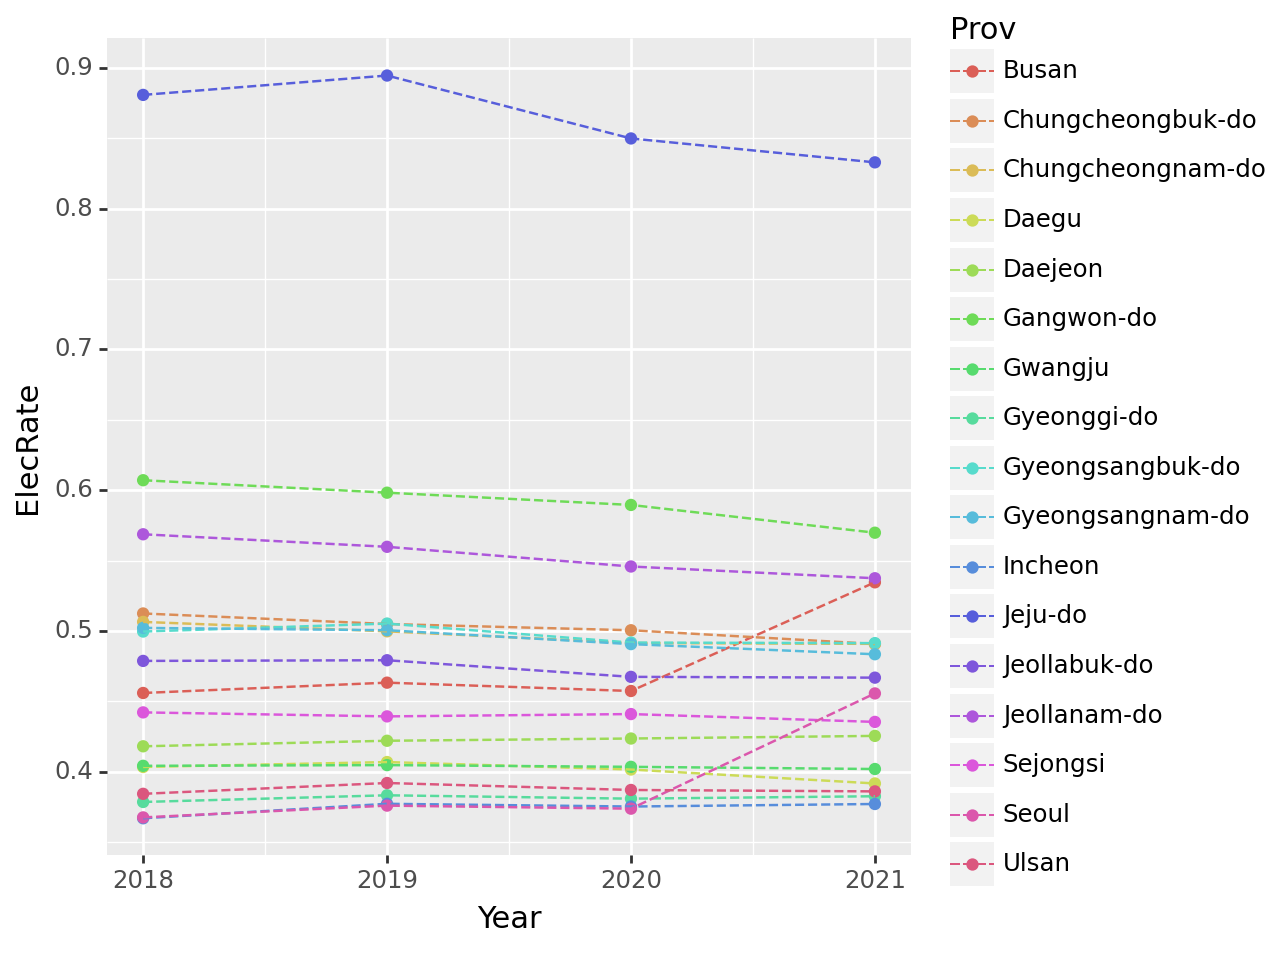

<Figure Size: (640 x 480)>

In [145]:
fig = ggplot(tidydata)
point = geom_point(aes(x = 'Year', y = 'ElecRate', color = 'Prov'), shape = 'o')
line = geom_line(aes(x = 'Year', y = 'ElecRate', color = 'Prov'), linetype = 'dashed')

fig + point + line

> 무조건 데이터프레임 만들고 groupby, 등등을 하는 테크닉을 연습해둘것

## 4. pd.merge()의 이용

In [146]:
before = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)
after = before\
    .melt(id_vars=['Year','Prov','Reg']).rename({'variable':'Type','value':'EnergyUse'},axis=1)\
    .pivot_table(index=['Year','Prov','Type'],values='EnergyUse',aggfunc='sum').reset_index()\
    .set_index(['Year','Prov','Type']).unstack()\
    .assign(ElecRate = lambda df: df[('EnergyUse','Elec')]/(df[('EnergyUse','Elec')]+df[('EnergyUse','Gas')]+df[('EnergyUse','Heat')]))\
    .iloc[:,-1].reset_index().set_axis(['Year','Prov','ElecRate'],axis=1)
display('before',before)
display('after',after)

'before'

,Year,Prov,Reg,Elec,Gas,Heat
0,2018,Seoul,종로구,64818,82015,111
1,2018,Seoul,중구,81672,75260,563
2,2018,Seoul,용산구,52659,85220,12043
3,2018,Seoul,성동구,60559,107416,0
4,2018,Seoul,광진구,70609,130308,0
...,...,...,...,...,...,...
995,2019,Jeju-do,서귀포시,34641,1306,0
996,2020,Jeju-do,제주시,99212,22179,0
997,2020,Jeju-do,서귀포시,35510,1639,0
998,2021,Jeju-do,제주시,103217,25689,0


'after'

,Year,Prov,ElecRate
0,2018,Busan,0.455996
1,2018,Chungcheongbuk-do,0.512447
2,2018,Chungcheongnam-do,0.506471
3,2018,Daegu,0.403464
4,2018,Daejeon,0.418136
...,...,...,...
63,2021,Jeollabuk-do,0.466878
64,2021,Jeollanam-do,0.537464
65,2021,Sejongsi,0.435457
66,2021,Seoul,0.455675


> before에서 after로 가는 일반적인 방법이 없을까?

In [148]:
before = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)
before

,Year,Prov,Reg,Elec,Gas,Heat
0,2018,Seoul,종로구,64818,82015,111
1,2018,Seoul,중구,81672,75260,563
2,2018,Seoul,용산구,52659,85220,12043
3,2018,Seoul,성동구,60559,107416,0
4,2018,Seoul,광진구,70609,130308,0
...,...,...,...,...,...,...
995,2019,Jeju-do,서귀포시,34641,1306,0
996,2020,Jeju-do,제주시,99212,22179,0
997,2020,Jeju-do,서귀포시,35510,1639,0
998,2021,Jeju-do,제주시,103217,25689,0


In [155]:
before.melt(id_vars = ['Year', 'Prov', 'Reg'])  ## Reg를 드롭하고 해도 된다.

,Year,Prov,Reg,variable,value
0,2018,Seoul,종로구,Elec,64818
1,2018,Seoul,중구,Elec,81672
2,2018,Seoul,용산구,Elec,52659
3,2018,Seoul,성동구,Elec,60559
4,2018,Seoul,광진구,Elec,70609
...,...,...,...,...,...
2995,2019,Jeju-do,서귀포시,Heat,0
2996,2020,Jeju-do,제주시,Heat,0
2997,2020,Jeju-do,서귀포시,Heat,0
2998,2021,Jeju-do,제주시,Heat,0


In [160]:
before.melt(id_vars = ['Year', 'Prov', 'Reg'])\
.groupby(by = ['Year', 'Prov', 'variable']).agg({'value' : sum}).reset_index().pivot_table(index = ['Year', 'Prov'], columns = )

,Year,Prov,variable,value
0,2018,Busan,Elec,613522
1,2018,Busan,Gas,708240
2,2018,Busan,Heat,23694
3,2018,Chungcheongbuk-do,Elec,361490
4,2018,Chungcheongbuk-do,Gas,288927
...,...,...,...,...
199,2021,Seoul,Gas,3617731
200,2021,Seoul,Heat,546491
201,2021,Ulsan,Elec,196412
202,2021,Ulsan,Gas,312276
